In [ ]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
# import rawpy
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def smoothstep(x):
    return 3 * x**2 - 2 * x**3

def inverse_smoothstep(y):
    return 0.5 - np.sin(np.arcsin(1 - 2 * y) / 3)

def gamma_compression(x, epsilon=1e-8):
    return np.maximum(x, epsilon) ** (1/2.2)

def inverse_gamma_compression(y, epsilon=1e-8):
    return np.maximum(y, epsilon) ** 2.2

def simulate_photon_shot_noise(intensity, gain):
    total_conversion_charges = intensity
    photon_shot_noise = np.random.poisson(total_conversion_charges)
    photon_shot_noise *= gain
    return photon_shot_noise

def tone_map(image):
    image_normalized = image.astype(np.float32) / 255.0
    tone_mapped_image = smoothstep(image_normalized)
    tone_mapped_image *= 255
    tone_mapped_image = tone_mapped_image.astype(np.uint8)
    return tone_mapped_image

def matrix_multiplication(mat1, mat2):
    return np.dot(mat1, mat2)

def matrix_inversion(mat):
    return np.linalg.inv(mat)

def remove_color_correction(rgb_image, color_correction_matrices):
    random_weights = np.random.rand(len(color_correction_matrices))
    random_weights /= np.sum(random_weights)
    combined_color_correction_matrix = np.zeros_like(color_correction_matrices[0])
    for i, weight in enumerate(random_weights):
        combined_color_correction_matrix += weight * color_correction_matrices[i]
    inverse_combined_color_correction_matrix = matrix_inversion(combined_color_correction_matrix)
    raw_data = matrix_multiplication(rgb_image, inverse_combined_color_correction_matrix)
    return raw_data

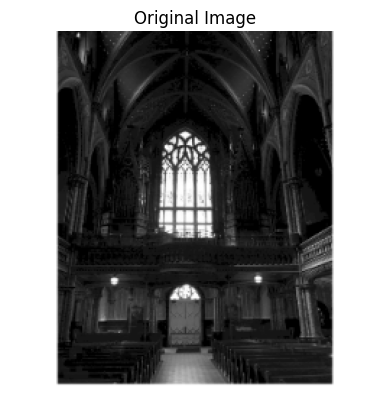

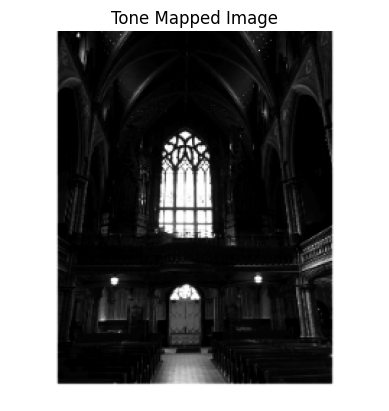

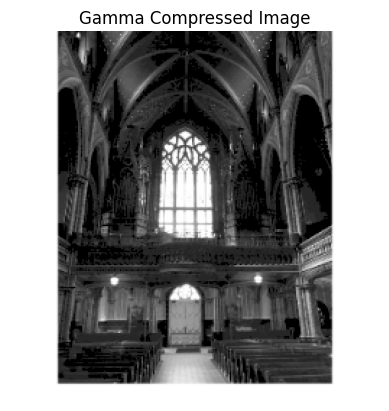

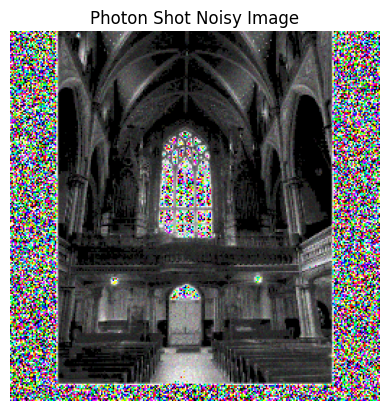

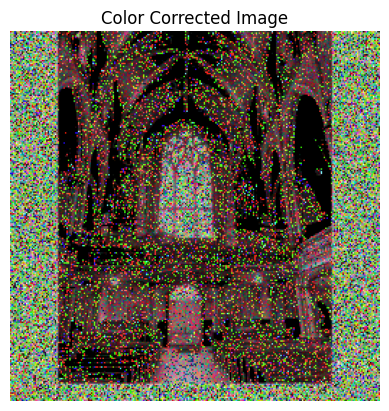

In [ ]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# import rawpy
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

# Function to display an image using matplotlib
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Smoothstep Function
def smoothstep(x):
    return 3 * x**2 - 2 * x**3

# Inverse Smoothstep
def inverse_smoothstep(y):
    return 0.5 - np.sin(np.arcsin(1 - 2 * y) / 3)

# Step 2: Gamma Compression
def gamma_compression(x, epsilon=1e-8):
    return np.maximum(x, epsilon) ** (1/2.2)

# Inverse Gamma Compression
def inverse_gamma_compression(y, epsilon=1e-8):
    return np.maximum(y, epsilon) ** 2.2

# Step 3: Simulate Photon Shot Noise
def simulate_photon_shot_noise(intensity, gain):
    total_conversion_charges = intensity
    photon_shot_noise = np.random.poisson(total_conversion_charges).astype(np.float64)  # Cast to float
    photon_shot_noise *= gain
    return photon_shot_noise

# Step 4: Tone Mapping
def tone_map(image):
    image_normalized = image.astype(np.float32) / 255.0
    tone_mapped_image = smoothstep(image_normalized)
    tone_mapped_image *= 255
    tone_mapped_image = tone_mapped_image.astype(np.uint8)
    return tone_mapped_image

# Step 5: Matrix Multiplication
def matrix_multiplication(mat1, mat2):
    return np.dot(mat1, mat2)

# Matrix Inversion
def matrix_inversion(mat):
    return np.linalg.inv(mat)

# Step 6: Remove Color Correction
def remove_color_correction(rgb_image, color_correction_matrices):
    random_weights = np.random.rand(len(color_correction_matrices))
    random_weights /= np.sum(random_weights)
    combined_color_correction_matrix = np.zeros_like(color_correction_matrices[0])
    for i, weight in enumerate(random_weights):
        combined_color_correction_matrix += weight * color_correction_matrices[i]
    inverse_combined_color_correction_matrix = matrix_inversion(combined_color_correction_matrix)
    raw_data = matrix_multiplication(rgb_image, inverse_combined_color_correction_matrix)
    return raw_data

# Main function to apply all steps and display after each step
def process_and_display(image_path, color_correction_matrices):
    # Load image
    image = cv2.imread(image_path)

    # Display original image
    display_image(image, title="Original Image")

    # Step 1: Tone Mapping
    tone_mapped_image = tone_map(image)
    display_image(tone_mapped_image, title="Tone Mapped Image")

    # Step 2: Gamma Compression
    gamma_compressed_image = gamma_compression(tone_mapped_image / 255.0) * 255
    gamma_compressed_image = gamma_compressed_image.astype(np.uint8)
    display_image(gamma_compressed_image, title="Gamma Compressed Image")

    # Step 3: Photon Shot Noise
    photon_shot_noisy_image = simulate_photon_shot_noise(gamma_compressed_image, gain=1.0)
    photon_shot_noisy_image = photon_shot_noisy_image.astype(np.uint8)
    display_image(photon_shot_noisy_image, title="Photon Shot Noisy Image")

    # Step 4: Remove Color Correction
    color_corrected_image = remove_color_correction(photon_shot_noisy_image, color_correction_matrices)
    color_corrected_image = color_corrected_image.astype(np.uint8)
    display_image(color_corrected_image, title="Color Corrected Image")

# Sample color correction matrices for testing
color_correction_matrices = [np.eye(3), np.random.rand(3, 3)]

# Main execution
if __name__ == "__main__":
    image_path = '/content/download-256x256.png'  # Path to your image file
    process_and_display(image_path, color_correction_matrices)


In [ ]:
def transform_rgb_to_raw(image_path):
    rgb_image = cv2.imread(image_path)
    rgb_image = np.asarray(rgb_image, dtype=np.float32)
    color_correction_matrices = [np.random.rand(3, 3) for _ in range(3)]
    raw_image = remove_color_correction(rgb_image, color_correction_matrices)
    return raw_image

def synthesize_dark_raw(raw_image, noise_level=0.1):
    noisy_raw_image = raw_image + noise_level * np.random.normal(size=raw_image.shape)
    return np.clip(noisy_raw_image, 0, 255)

def preprocess_image(image_path):
    raw_image = transform_rgb_to_raw(image_path)
    dark_raw_image = synthesize_dark_raw(raw_image)
    return raw_image, dark_raw_image


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

def create_unet_model(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)

    # Decoder
    up4 = UpSampling2D(size=(2, 2))(conv3)
    conv2_cropped = crop_to_match(conv2, up4)
    up4 = concatenate([up4, conv2_cropped])
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(up4)
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)

    up5 = UpSampling2D(size=(2, 2))(conv4)
    conv1_cropped = crop_to_match(conv1, up5)
    up5 = concatenate([up5, conv1_cropped])
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv5)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

def crop_to_match(x, target):
    from tensorflow.keras.layers import Cropping2D
    diff_h = (x.shape[1] - target.shape[1]) // 2
    diff_w = (x.shape[2] - target.shape[2]) // 2
    return Cropping2D(cropping=((diff_h, diff_h), (diff_w, diff_w)))(x)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def preprocess_data(image_paths, target_size):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=target_size, color_mode='rgb')
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
    return np.array(images)

def generate_dark_images(images):
    # Implement dark image generation logic here
    return images  # Placeholder; replace with actual dark image synthesis


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

def train_denoising_network(training_image_paths):
    input_shape = (256, 256, 3)  # Adjust as needed
    model = create_unet_model(input_shape)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss=MeanSquaredError(), metrics=['accuracy'])

    training_images = preprocess_data(training_image_paths, target_size=(256, 256))
    dark_images = generate_dark_images(training_images)

    model.fit(dark_images, training_images, epochs=10, batch_size=2, validation_split=0.1)
    return model

def test_denoising_network(model, test_image_paths):
    test_images = preprocess_data(test_image_paths, target_size=(256, 256))
    denoised_images = model.predict(test_images)

    # Save or visualize denoised_images as needed
    print("Denoised images shape:", denoised_images.shape)


In [ ]:
def train_denoising_network(training_image_paths):
    clear_raw_images = []
    dark_raw_images = []
    for image_path in training_image_paths:
        clear_raw, dark_raw = preprocess_image(image_path)
        clear_raw_images.append(clear_raw)
        dark_raw_images.append(dark_raw)
    clear_raw_images = np.array(clear_raw_images)
    dark_raw_images = np.array(dark_raw_images)
    input_shape = clear_raw_images.shape[1:]
    model = create_unet_model(input_shape)
    model.fit(dark_raw_images, clear_raw_images, epochs=10, batch_size=1)
    return model


In [ ]:
def postprocess_image(raw_image):
    with rawpy.imread(raw_image) as raw:
        rgb_image = raw.postprocess()
    return rgb_image

def test_denoising_network(model, test_image_paths):
    for image_path in test_image_paths:
        clear_raw = transform_rgb_to_raw(image_path)
        dark_raw = synthesize_dark_raw(clear_raw)
        dark_raw = np.expand_dims(dark_raw, axis=0)
        denoised_raw = model.predict(dark_raw)
        denoised_raw_image = postprocess_image(denoised_raw.squeeze())
        output_path = f'/content/denoised_image_{image_path.split("/")[-1]}'
        cv2.imwrite(output_path, denoised_raw_image)
        print(f"Denoised image saved to {output_path}")


In [ ]:
if __name__ == "__main__":
    training_image_paths = ['/content/download-256x256.png','/content/pexels-photo-5388521.jpeg','/content/pexels-photo-5458369.webp','/content/pexels-photo-6589610.webp']
    model = train_denoising_network(training_image_paths)

    test_image_paths = ['/content/download-256x256.png']
    test_denoising_network(model, test_image_paths)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 19s/step - accuracy: 0.0251 - loss: 0.1429 - val_accuracy: 0.5434 - val_loss: 0.2354
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 30s 9s/step - accuracy: 0.0775 - loss: 0.1416 - val_accuracy: 0.5437 - val_loss: 0.2346
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 8s/step - accuracy: 0.0168 - loss: 0.1303 - val_accuracy: 0.5437 - val_loss: 0.2337
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 8s/step - accuracy: 0.0308 - loss: 0.1387 - val_accuracy: 0.5437 - val_loss: 0.2328
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.0187 - loss: 0.1280 - val_accuracy: 0.5437 - val_loss: 0.2315
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 9s/step - accuracy: 0.0373 - loss: 0.1266 - val_accuracy: 0.5437 - val_loss: 0.2300
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 9s/step - accuracy: 0.1304 - loss: 0.1361 - val_accuracy: 0.5437 - val_loss: 0.2277
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 7s/step - accuracy: 0.1334 - loss: 0.1313 - val_accuracy: 0.5437 - val_loss: 0.2237
Epoch 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


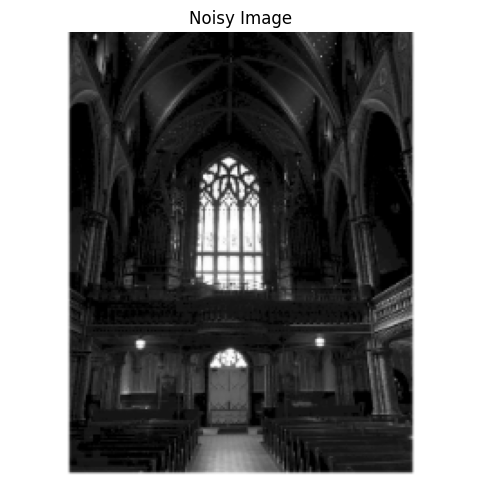

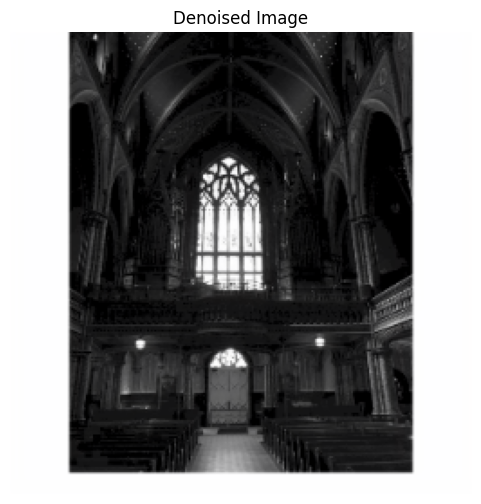

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Input, Add
from tensorflow.keras.models import Model

# DnCNN Model Definition
def build_dncnn(input_shape=(256, 256, 3), num_layers=17, filters=64):
    input_img = Input(shape=input_shape)

    # First Layer
    x = Conv2D(filters, kernel_size=3, padding='same', activation=None)(input_img)
    x = ReLU()(x)

    # Intermediate Layers
    for _ in range(num_layers - 2):
        x = Conv2D(filters, kernel_size=3, padding='same', activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)

    # Last Layer
    x = Conv2D(input_shape[-1], kernel_size=3, padding='same', activation=None)(x)

    # Residual Learning: Output should be the residual (noise)
    output_img = Add()([input_img, x])

    model = Model(inputs=input_img, outputs=output_img)
    return model

# Function to display the image using Matplotlib
def display_image(image, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')  # Hide axis
    plt.show()

# Function to process the test image using the trained model
def test_denoising_network(model, test_image_paths):
    for path in test_image_paths:
        # Load the test image
        noisy_image = cv2.imread(path)
        noisy_image_resized = cv2.resize(noisy_image, (256, 256))  # Resize for model input

        # Preprocess the image (normalize and expand dimensions)
        noisy_image_input = np.expand_dims(noisy_image_resized / 255.0, axis=0)

        # Denoise the image using the trained model
        denoised_image = model.predict(noisy_image_input)
        denoised_image = np.clip(denoised_image[0], 0, 1)  # Ensure valid pixel range [0,1]
        denoised_image = (denoised_image * 255).astype(np.uint8)  # Convert back to uint8

        # Display the original noisy image
        display_image(noisy_image_resized, title="Noisy Image")

        # Display the enhanced denoised image
        display_image(denoised_image, title="Denoised Image")

if __name__ == "__main__":
    # Example usage
    training_image_paths = ['/content/download-256x256.png']

    # Build DnCNN Model
    model = build_dncnn()
    model.compile(optimizer='adam', loss='mean_squared_error')

    test_image_paths = ['/content/download-256x256.png']

    # Assume train_denoising_network is adapted to use this model
    # train_denoising_network(model, training_image_paths)  # Uncomment this line for training

    # Test and display the result
    test_denoising_network(model, test_image_paths)


RessNet

Error loading image: /content/pexels-photo-5388521.jpeg
Error loading image: /content/pexels-photo-5458369.webp
Error loading image: /content/pexels-photo-6589610.webp
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 45s 45s/step - loss: 0.1790
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1745
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1364
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0652
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0223
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0118
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0111
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0110
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0105
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0100
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0096
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0092
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0087
Epoch 14/50
1/1 ━━━━

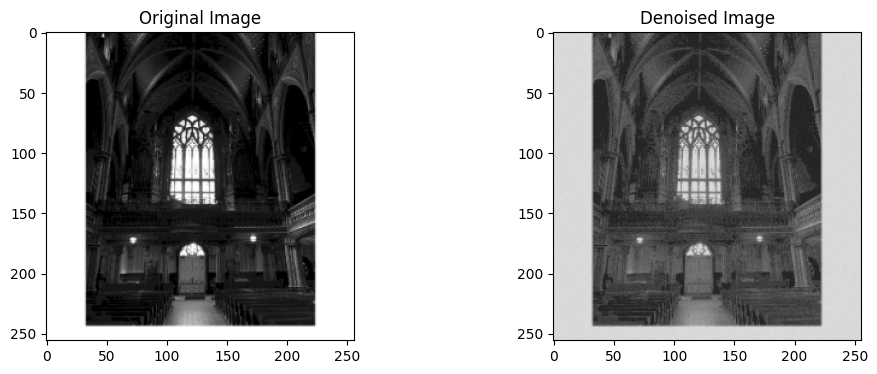

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def load_and_preprocess_images(image_paths):
    images = []
    for path in image_paths:
        # Load image
        image = cv2.imread(path, cv2.IMREAD_COLOR)
        if image is None:
            print(f"Error loading image: {path}")
            continue

        # Resize image to 256x256
        image = cv2.resize(image, (256, 256))

        # Normalize image data to range [0, 1]
        image = image.astype(np.float32) / 255.0

        images.append(image)
    return np.array(images)

def rgb_to_raw(image):
    # Use Rawpy to simulate conversion from RGB to RAW
    with rawpy.imread(image) as raw:
        raw_image = raw.raw_image.copy()
    return raw_image

def train_denoising_network(training_image_paths):
    # Load and preprocess training data
    train_data = load_and_preprocess_images(training_image_paths)

    # Simulate noisy dark RAW images by adding noise
    noise_factor = 0.4
    train_noisy_data = train_data + noise_factor * np.random.normal(size=train_data.shape)
    train_noisy_data = np.clip(train_noisy_data, 0.0, 1.0)

    # ResNet model for denoising
    resnet_base = ResNet50(include_top=False, weights=None, input_shape=(256, 256, 3))
    x = layers.Flatten()(resnet_base.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(256 * 256 * 3, activation='sigmoid')(x)
    x = layers.Reshape((256, 256, 3))(x)

    resnet_model = models.Model(inputs=resnet_base.input, outputs=x)
    resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Training the ResNet model
    resnet_model.fit(train_noisy_data, train_data, batch_size=16, epochs=50)

    return resnet_model

def test_denoising_network(model, test_image_paths):
    # Load and preprocess test data
    test_data = load_and_preprocess_images(test_image_paths)

    # Predict denoised images
    denoised_images = model.predict(test_data)

    # Display original, noisy, and denoised images
    for i, denoised_image in enumerate(denoised_images):
        plt.figure(figsize=(12, 4))

        # Show original image
        plt.subplot(1, 2, 1)
        plt.imshow(test_data[i])
        plt.title('Original Image')

        # Show denoised image
        plt.subplot(1, 2, 2)
        plt.imshow(denoised_image)
        plt.title('Denoised Image')

        plt.show()

if __name__ == "__main__":
    # Provide multiple training image paths
    training_image_paths = [
        '/content/download-256x256.png',
        '/content/pexels-photo-5388521.jpeg',
        '/content/pexels-photo-5458369.webp',
        '/content/pexels-photo-6589610.webp'
    ]

    # Train the denoising network using ResNet
    model = train_denoising_network(training_image_paths)

    # Test image paths
    test_image_paths = ['/content/download-256x256.png']

    # Test the denoising network and visualize results
    test_denoising_network(model, test_image_paths)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


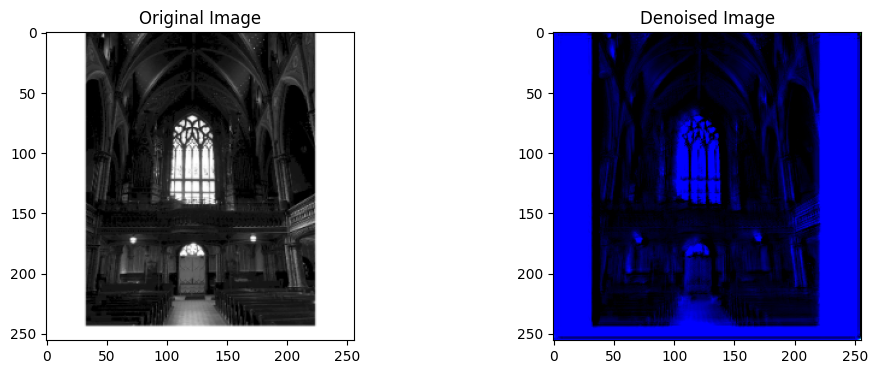

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Input, Add
from tensorflow.keras.models import Model

# Residual Block Definition
def residual_block(x, filters=64, kernel_size=3):
    residual = x
    x = Conv2D(filters, kernel_size=kernel_size, padding='same', activation=None)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size=kernel_size, padding='same', activation=None)(x)
    x = BatchNormalization()(x)

    # Skip connection (Add input to output of Conv layers)
    x = Add()([x, residual])
    x = ReLU()(x)
    return x

# ResNet Model Definition for Denoising
def build_resnet_denoising(input_shape=(256, 256, 3), num_res_blocks=15, filters=64):
    input_img = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv2D(filters, kernel_size=3, padding='same', activation=None)(input_img)
    x = ReLU()(x)

    # Residual Blocks
    for _ in range(num_res_blocks):
        x = residual_block(x, filters=filters)

    # Final Conv Layer
    x = Conv2D(input_shape[-1], kernel_size=3, padding='same', activation=None)(x)

    # Residual Learning: Output should be the residual (noise)
    output_img = Add()([input_img, x])

    model = Model(inputs=input_img, outputs=output_img)
    return model

# The rest of your test and display code remains the same
if __name__ == "__main__":
    # Example usage
    training_image_paths = ['/content/download-256x256.png']

    # Build ResNet-based Denoising Model
    model = build_resnet_denoising()
    model.compile(optimizer='adam', loss='mean_squared_error')

    test_image_paths = ['/content/download-256x256.png']

    # Test and display the result
    test_denoising_network(model, test_image_paths)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


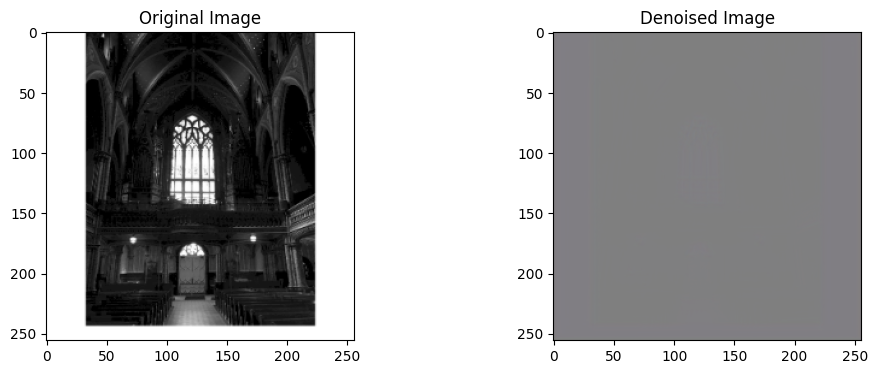

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate, Input
from tensorflow.keras.models import Model

# U-Net Model Definition
def build_unet(input_shape=(256, 256, 3), filters=64):
    inputs = Input(input_shape)

    # Encoder (Downsampling)
    c1 = Conv2D(filters, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(filters, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D(pool_size=(2, 2))(c1)

    c2 = Conv2D(filters * 2, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(filters * 2, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D(pool_size=(2, 2))(c2)

    c3 = Conv2D(filters * 4, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(filters * 4, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D(pool_size=(2, 2))(c3)

    # Bottleneck
    b = Conv2D(filters * 8, (3, 3), activation='relu', padding='same')(p3)
    b = Conv2D(filters * 8, (3, 3), activation='relu', padding='same')(b)

    # Decoder (Upsampling)
    u3 = UpSampling2D(size=(2, 2))(b)
    u3 = concatenate([u3, c3], axis=-1)
    c4 = Conv2D(filters * 4, (3, 3), activation='relu', padding='same')(u3)
    c4 = Conv2D(filters * 4, (3, 3), activation='relu', padding='same')(c4)

    u2 = UpSampling2D(size=(2, 2))(c4)
    u2 = concatenate([u2, c2], axis=-1)
    c5 = Conv2D(filters * 2, (3, 3), activation='relu', padding='same')(u2)
    c5 = Conv2D(filters * 2, (3, 3), activation='relu', padding='same')(c5)

    u1 = UpSampling2D(size=(2, 2))(c5)
    u1 = concatenate([u1, c1], axis=-1)
    c6 = Conv2D(filters, (3, 3), activation='relu', padding='same')(u1)
    c6 = Conv2D(filters, (3, 3), activation='relu', padding='same')(c6)

    # Output layer
    outputs = Conv2D(input_shape[-1], (1, 1), activation='sigmoid')(c6)

    model = Model(inputs, outputs)
    return model

# The rest of your test and display code remains the same
if __name__ == "__main__":
    # Example usage
    training_image_paths = ['/content/download-256x256.png']

    # Build U-Net Model for Denoising
    model = build_unet()
    model.compile(optimizer='adam', loss='mean_squared_error')

    test_image_paths = ['/content/download-256x256.png']

    # Test and display the result
    test_denoising_network(model, test_image_paths)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


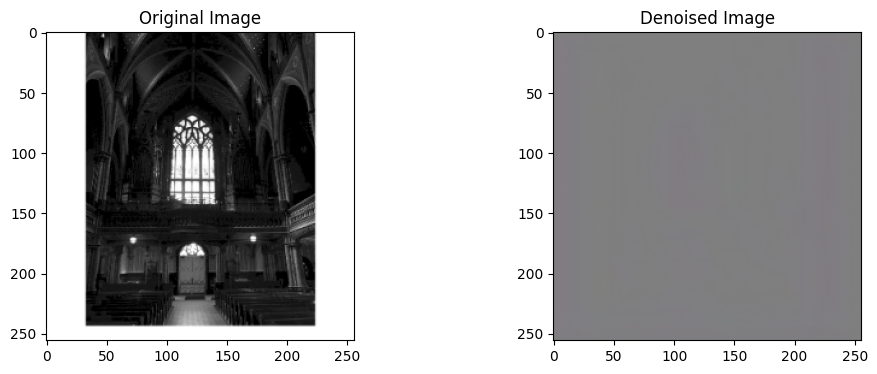

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model

# Autoencoder Model Definition
def build_autoencoder(input_shape=(256, 256, 3), filters=64):
    inputs = Input(input_shape)

    # Encoder
    x = Conv2D(filters, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(filters * 2, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(filters * 4, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Bottleneck (lowest representation)
    x = Conv2D(filters * 8, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = Conv2D(filters * 4, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(filters * 2, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)

    # Output layer
    outputs = Conv2D(input_shape[-1], (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(inputs, outputs)
    return model

# The rest of your test and display code remains the same
if __name__ == "__main__":
    # Example usage
    training_image_paths = ['/content/download-256x256.png']

    # Build Autoencoder Model for Denoising
    model = build_autoencoder()
    model.compile(optimizer='adam', loss='mean_squared_error')

    test_image_paths = ['/content/download-256x256.png']

    # Test and display the result
    test_denoising_network(model, test_image_paths)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Input, Add
import numpy as np
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# U-Net Model Definition
def build_unet(input_shape=(256, 256, 3), filters=64):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(filters, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(filters, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D(pool_size=(2, 2))(c1)

    c2 = Conv2D(filters * 2, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(filters * 2, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D(pool_size=(2, 2))(c2)

    # Bottleneck
    b = Conv2D(filters * 4, (3, 3), activation='relu', padding='same')(p2)

    # Decoder
    u2 = UpSampling2D(size=(2, 2))(b)
    u2 = concatenate([u2, c2], axis=-1)
    c3 = Conv2D(filters * 2, (3, 3), activation='relu', padding='same')(u2)
    c3 = Conv2D(filters * 2, (3, 3), activation='relu', padding='same')(c3)

    u1 = UpSampling2D(size=(2, 2))(c3)
    u1 = concatenate([u1, c1], axis=-1)
    c4 = Conv2D(filters, (3, 3), activation='relu', padding='same')(u1)
    c4 = Conv2D(filters, (3, 3), activation='relu', padding='same')(c4)

    # Output layer
    outputs = Conv2D(input_shape[-1], (1, 1), activation='sigmoid')(c4)

    model = Model(inputs, outputs)
    return model

if __name__ == "__main__":
    model = build_unet()
    model.compile(optimizer='adam', loss='mean_squared_error')
    test_image_paths = ['/content/download-256x256.png']
    # Test and display the result
    test_denoising_network(model, test_image_paths)


NameError: name 'Model' is not defined